In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
import json


In [3]:
data = pd.read_csv('data/food-inspections.csv')

In [4]:
print(data.shape)
data.head(3)


(196030, 22)


Inspection ID                          DBA Name  \
0        2345787  CARNICERIA LEON GUANAJUATO, INC.   
1        2345790           AMSTAR FUEL & MINI MART   
2        2345766                       ROJO GUSANO   

                           AKA Name  License #  Facility Type  \
0  CARNICERIA LEON GUANAJUATO, INC.  1821637.0  Grocery Store   
1           AMSTAR FUEL & MINI MART  1426374.0  Grocery Store   
2                       ROJO GUSANO  1305286.0     Restaurant   

              Risk                    Address     City State      Zip  ...  \
0    Risk 1 (High)  4301-4305 W ARMITAGE AVE   CHICAGO    IL  60639.0  ...   
1  Risk 2 (Medium)        3759 W CHICAGO AVE   CHICAGO    IL  60651.0  ...   
2    Risk 1 (High)       3830 W LAWRENCE AVE   CHICAGO    IL  60625.0  ...   

  Results                                         Violations   Latitude  \
0    Fail  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.916960   
1    Pass  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.895304   
2    Fail  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.968390   

   Longitude                                           Location  \
0 -87.733945  {'latitude': '-87.7339453364064', 'longitude':...   
1 -87.721129  {'latitude': '-87.72112910359348', 'longitude'...   
2 -87.724448  {'latitude': '-87.72444785924317', 'longitude'...   

   Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts  Wards  
0                         NaN       NaN              NaN            NaN    NaN  
1                         NaN       NaN              NaN            NaN    NaN  
2                         NaN       NaN              NaN            NaN    NaN  

[3 rows x 22 columns]

In [5]:
data.isnull().sum().sort_values(ascending=False)

Wards                         196030
Community Areas               196030
Zip Codes                     196030
Historical Wards 2003-2015    196030
Census Tracts                 196030
Violations                     52026
Facility Type                   4772
AKA Name                        2459
Latitude                         690
Longitude                        690
Location                         690
City                             138
Risk                              71
Zip                               50
State                             42
License #                         17
Inspection Type                    1
DBA Name                           0
Inspection Date                    0
Address                            0
Results                            0
Inspection ID                      0
dtype: int64

In [6]:
data=data.dropna(subset=['Facility Type','Latitude','Violations','Risk','Longitude','AKA Name'])
print(data.shape)

(142266, 22)


In [7]:
data.Risk.value_counts()

Risk 1 (High)      108033
Risk 2 (Medium)     26683
Risk 3 (Low)         7550
Name: Risk, dtype: int64

In [8]:
# data.drop( data[ data['Risk'] == 'All' ].index , inplace=True)
# print(data.shape)

In [9]:
data['year']=data['Inspection Date'].apply(lambda x:x.split('-')[0])
data['month']=data['Inspection Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])

In [10]:
data.head()

Inspection ID                             DBA Name  \
0        2345787     CARNICERIA LEON GUANAJUATO, INC.   
1        2345790              AMSTAR FUEL & MINI MART   
2        2345766                          ROJO GUSANO   
3        2345702       LAKESIDE FOOD WINE SPIRITS LLC   
4        2345678  NEW KNOWLEDGE LEARNING CENTER, INC.   

                              AKA Name  License #  \
0     CARNICERIA LEON GUANAJUATO, INC.  1821637.0   
1              AMSTAR FUEL & MINI MART  1426374.0   
2                          ROJO GUSANO  1305286.0   
3       LAKESIDE FOOD WINE SPIRITS LLC  2694148.0   
4  NEW KNOWLEDGE LEARNING CENTER, INC.  2215898.0   

                  Facility Type             Risk                    Address  \
0                 Grocery Store    Risk 1 (High)  4301-4305 W ARMITAGE AVE    
1                 Grocery Store  Risk 2 (Medium)        3759 W CHICAGO AVE    
2                    Restaurant    Risk 1 (High)       3830 W LAWRENCE AVE    
3                 Grocery Store     Risk 3 (Low)         2601 N HALSTED ST    
4  Children's Services Facility    Risk 1 (High)         8440 S KEDZIE AVE    

      City State      Zip  ...  Longitude  \
0  CHICAGO    IL  60639.0  ... -87.733945   
1  CHICAGO    IL  60651.0  ... -87.721129   
2  CHICAGO    IL  60625.0  ... -87.724448   
3  CHICAGO    IL  60614.0  ... -87.648746   
4  CHICAGO    IL  60652.0  ... -87.702257   

                                            Location  \
0  {'latitude': '-87.7339453364064', 'longitude':...   
1  {'latitude': '-87.72112910359348', 'longitude'...   
2  {'latitude': '-87.72444785924317', 'longitude'...   
3  {'latitude': '-87.64874626496409', 'longitude'...   
4  {'latitude': '-87.70225675980141', 'longitude'...   

  Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts Wards  \
0                        NaN       NaN              NaN            NaN   NaN   
1                        NaN       NaN              NaN            NaN   NaN   
2                        NaN       NaN              NaN            NaN   NaN   
3                        NaN       NaN              NaN            NaN   NaN   
4                        NaN       NaN              NaN            NaN   NaN   

   year  month  day  
0  2019     11   18  
1  2019     11   18  
2  2019     11   18  
3  2019     11   15  
4  2019     11   15  

[5 rows x 25 columns]

### Inspection visualization

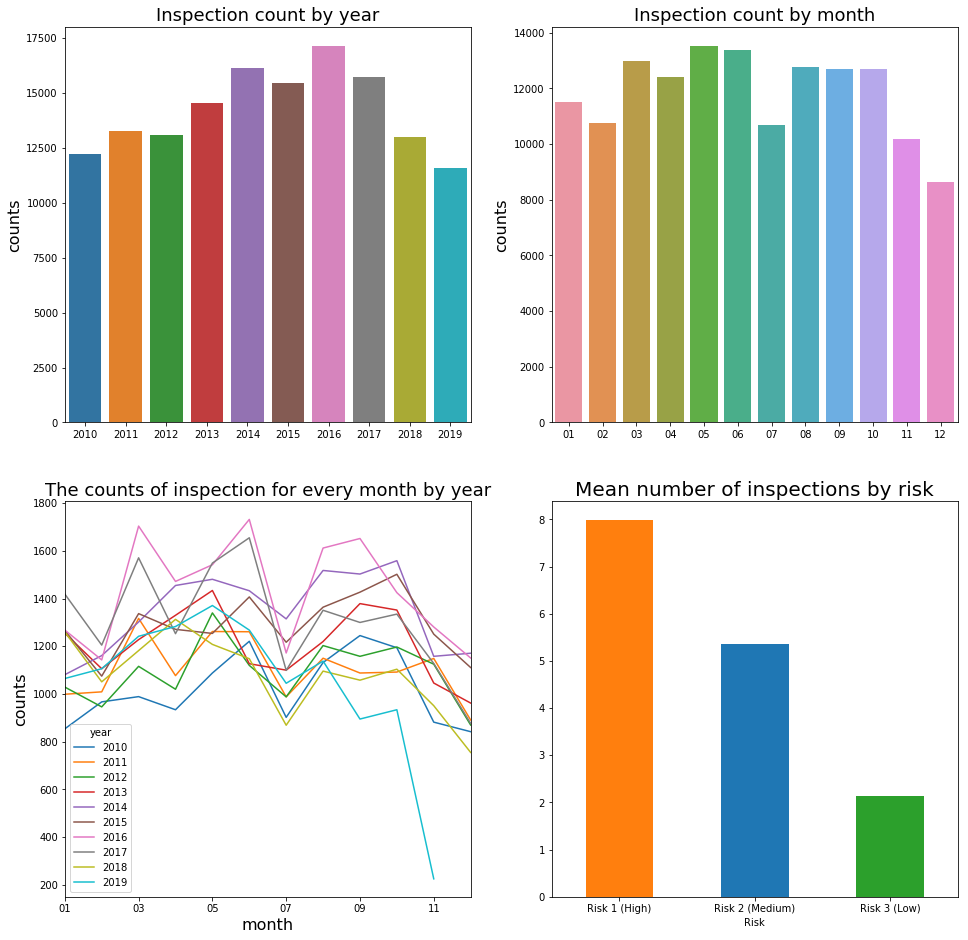

In [19]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
sns.barplot(x=data.year.value_counts().index,y=data.year.value_counts(), ax = ax[0,0])
ax[0,0].set_title("Inspection count by year",size=18)
ax[0,0].set_ylabel('counts',size=16)
ax[0,0].set_xlabel('')

sns.barplot(x=data.month.value_counts().index,y=data.month.value_counts(), ax = ax[0,1])
ax[0,1].set_title("Inspection count by month",size=18)
ax[0,1].set_ylabel('counts',size=16)
ax[0,1].set_xlabel('')
# plt.show()

data.groupby(['year','month'])['Inspection ID'].agg('count').unstack('year').plot( ax = ax[1,0])
ax[1,0].set_title("The counts of inspection for every month by year",size=18)
ax[1,0].set_ylabel('counts',size=16)
ax[1,0].set_xlabel('month',size=16)
# plt.show()


colors = ['C1','C0','C2']
data.groupby(['Risk', 'DBA Name'])['Inspection ID'].agg('count').unstack('Risk').mean().plot(kind='bar', color = colors, ax = ax[1,1])
ax[1,1].set_title("Mean number of inspections by risk",size=20)
ax[1,1].tick_params(axis='x',labelrotation=360)
plt.show()

### Risk visualization

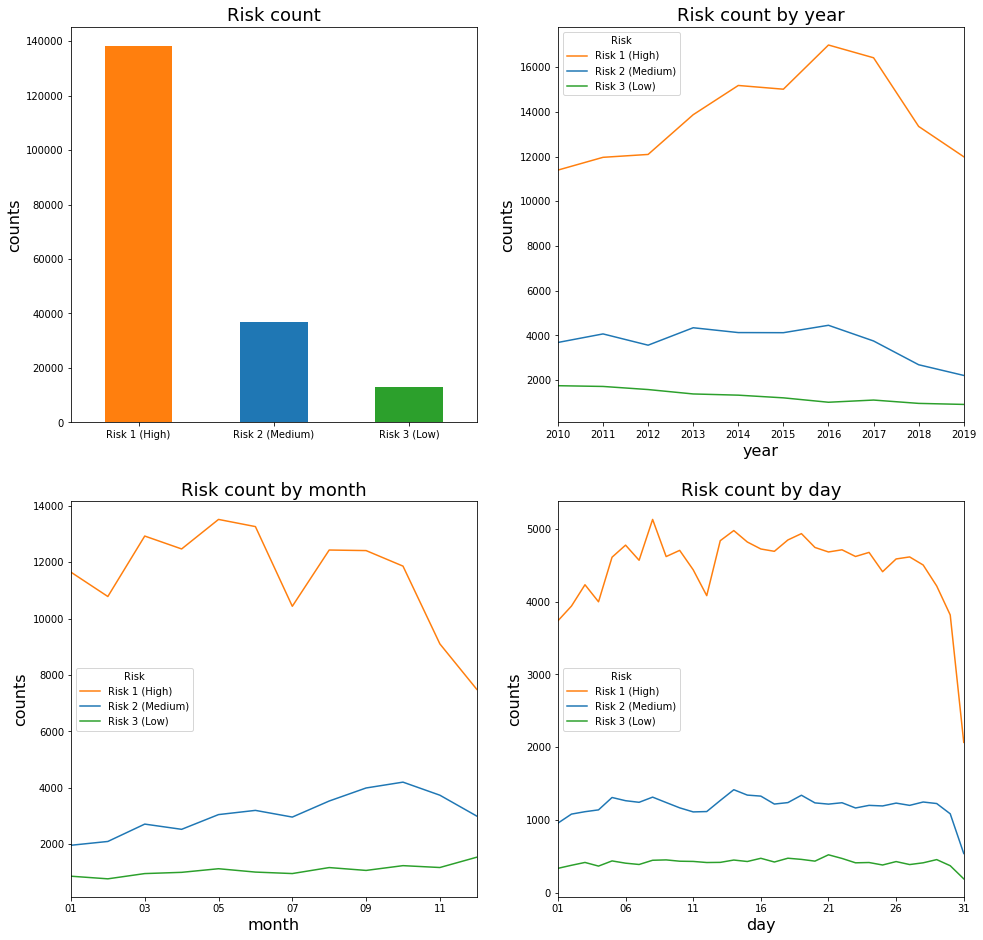

In [63]:

fig,ax=plt.subplots(2,2,figsize=(16,16))
data.Risk.value_counts().plot(kind = 'bar', color= colors, ax = ax[0,0]) 
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("Risk count",size=18)
ax[0,0].set_ylabel('counts',size=16)

data.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[0,1], color = colors)
ax[0,1].set_title("Risk count by year",size=18)
ax[0,1].set_ylabel('counts',size=16)
ax[0,1].set_xlabel('year',size=16)


data.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[1,0], color = colors)
ax[1,0].set_title("Risk count by month",size=18)
ax[1,0].set_ylabel('counts',size=16)
ax[1,0].set_xlabel('month',size=16)

data.groupby(['day','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax = ax[1,1], color = colors)
ax[1,1].set_title("Risk count by day",size=18)
ax[1,1].set_ylabel('counts',size=16)
ax[1,1].set_xlabel('day',size=16)

plt.show()

In [171]:
data_risk1 = data[data['Risk'] == 'Risk 1 (High)' ]
data_risk2 = data[data['Risk'] == 'Risk 2 (Medium)' ]
data_risk3 = data[data['Risk'] == 'Risk 3 (Low)' ]

(108033, 25)

In [ ]:

ax = sns.jointplot("Latitude", "Longitude", data=data_risk1[0:500], kind="kde", space=0, color= colors[0], height=7)
ax.fig.suptitle("Risk 1 (High)")
plt.show()

ax = sns.jointplot("Latitude", "Longitude", data=data_risk2[0:500], kind="kde", space=0, color= colors[1], height=7)
ax.fig.suptitle("Risk 2 (Medium)")
plt.show()

ax = sns.jointplot("Latitude", "Longitude", data=data_risk3[0:500], kind="kde", space=0, color= colors[2], height=7)
ax.fig.suptitle("Risk 3 (Low)")
plt.show()


In [197]:
coord = [data_risk1["Latitude"].mean(),data_risk1["Longitude"].mean()] 
m_risk1= folium.Map(location= coord,tiles='Stamen Toner', zoom_start=10)
coords = data_risk1[['Latitude', 'Longitude']].as_matrix()
m_risk1.add_child(plugins.HeatMap(coords, radius=15))
m_risk1



/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
coord = [data_risk2["Latitude"].mean(),data_risk2["Longitude"].mean()] 
m_risk2= folium.Map(location= coord,tiles='Stamen Toner', zoom_start=10)
coords = data_risk2[['Latitude', 'Longitude']].as_matrix()
m_risk2.add_child(plugins.HeatMap(coords, radius=15))
m_risk2



/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
coord = [data_risk3["Latitude"].mean(),data_risk3["Longitude"].mean()] 
m_risk3= folium.Map(location= coord,tiles='Stamen Toner', zoom_start=10)
coords = data_risk3[['Latitude', 'Longitude']].as_matrix()
m_risk3.add_child(plugins.HeatMap(coords, radius=15))
m_risk3



/home/red/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
with open('chicago_zctas.geojson','r') as jsonFile:
    new_data = json.load(jsonFile)
tmp = new_data

#Create new JSON object
new_json = dict.fromkeys(['types','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = "features"

# Save new JSON object
open("updated-file.json","w").write(json.dumps(new_json,sort_keys = True, indent = 4,separators=(",",":")))

79

In [64]:
def create_map(table,zips,add_text=""):
    chicago_geo = r'updated-file.json'
    # initiating a Folium map with longitude and latitude
    m = folium.Map(location = coord,tiles='Stamen Toner', zoom_start = 11)
    # creating a choropleth map
    m.choropleth(
        geo_data = chicago_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.name',
        # first element contains location information, second element contains feature of interest
        columns = [zips],
        fill_color = 'RdYlGn',
        #legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across LA'
    )
    folium.LayerControl().add_to(m)
    # save map with filename based on the feature of interest
    m.save(outfile = mapped_feature + '_map.html')